**Abstract:**

For my Machine Learning project, I aim to investigate: *To what extent can video category and metadata (duration, bitrate, frame rate) predict the numerical value of views on YouTube videos using regression models measured by RMSE and R²?* I used a YouTube dataset from Kaggle, cleaned the data, and conducted exploratory analysis to examine the distribution of engagement metrics. Multiple regression approaches were applied, including Linear Regression as a baseline model, then Random Forest and Gradient Boosting. Engagement variables were highly skewed and weakly correlated with the available metadata, demonstrating limited predictive performance. Gradient Boosting performed the best (R² = 0.144, RMSE = 2.358), though it explained only a small portion of engagement variance. Feature-importance analysis and engagement-ratio comparisons showed that no strong or consistent predictors emerged despite a few relatively higher ratios for Gaming. Overall, the results indicate that basic video metadata provides minimal explanatory power, suggesting that most variation in YouTube engagement is driven by factors not captured in this dataset.

**Overview and Motivation:**

YouTube is a social media service provided by Google that has public videos made available for entertainment purposes. Every day I stream YouTube videos, ranging from podcasts, music videos, and movie reactions. I have also noticed that occasionally a new video will go viral and have been very curious about what causes this. I discovered a YouTube dataset on Kaggle, and with YouTube videos, I aim to investigate supervised learning models to predict engagement on YouTube videos based on metadata features such as video category. Although engagement includes views, likes, and comments, the predictive models in this project focus specifically on predicting view counts, while model performance will be evaluated through RMSE and R² metrics.

**Related Work:**

Every day I stream YouTube videos, ranging from podcasts, music videos, movies or trailer reactions, and ASMR. I've also noticed that every few years, occassionally new music music video or meme will go viral. For example, back in 2021, when the "Driver's License" music video by Olivia Rodrigo suddently blew up overnight, and then-on she became a big mainstream artist. I've always been very curious about what causes these types of videos to go viral. I've never had the oppertunity before to look into this, however, it's always been something I've been very curious about. So when I stumbled across a YouTube dataset on Kaggle, it all came together naturally like this.

**Data:**

In [ ]:
# Making proper imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

This YouTube Kaggle dataset: https://www.kaggle.com/datasets/cyberevil545/youtube-videos-data-for-ml-and-trend-analysis, contains 17,950 YouTube videos randomly sampled through the YouTube Data API. It includes publicly available metadata within a wide variety of categories, with no copyrighted content. The features of the dataset include:
*   **Identifiers and Descriptions:** Video ID, Title, URL
*   **Video Attributes:** Duration (seconds), Resolution (height and width), Bitrate, Frame Rate, Codec Information
*   **Categorical Metadata:** Video Category, Hashtags
*   **Engagement Metrics:** Views, Likes, Comments

These videos span multiple genres including: Music, Entertainment, Gaming, Pets/Animals, and Technology reviews, ranging from small creators with a few thousand views to major viral hits. 17,950 rows of this data are available for data analysis. I used this full dataset initially for EDA, and then a filtered-clean version (around 15,000-17,000) for training regression models.

With this dataset, I intend to predict video popularity and virality based around certain categories to inform daily users, content creators, and social media analysts from Google, its parent company, for example. Implementing regression models can further enhance predictions and potentially inform recommendation systems.

In [ ]:
# Loading the dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('youtube_data.csv')

Saving youtube_data.csv to youtube_data.csv



**Data Cleaning:**
The initial inspection of this dataset showed that the column names were consistent and labeled, with no nested lists or dictionaries embedded from within the features. Duplicate rows were checked, and none were found:

In [ ]:
# Counting duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

# Dropping all duplicates
df = df.drop_duplicates()

number of duplicate rows:  (0, 17)


Afterward, the data types were inventoried. Continuous numerical features included: views, likes, comment count, duration (seconds), height, width, bitrate, and frame rate. While categorical and nominal features included: video category, codec, and hashtags with the text fields, video title and URL being retained for future analysis. A missing-value assessment revealed that there were relatively small proportions of null entries across most columns, so numerical columns were filled with their respective means, and categorical columns were filled with their modes:

hashtags       1576
description    1112
dtype: int64


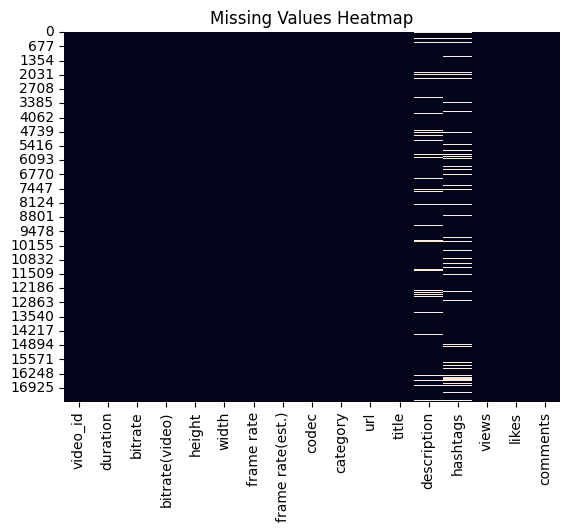

In [ ]:
# Inspecting Missing Values

# Counting missing values per column
missing_values_count = df.isnull().sum().sort_values(ascending=False)
print(missing_values_count[missing_values_count > 0])

# Visualizing missing values
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
# Handling Missing Data

# Mean imputation for numeric columns
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].mean())

# Mode imputation for categorical columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
# Fixing Data Types

# Converting numeric columns stored as text
numeric_columns = ['views', 'likes', 'comment_count', 'duration_seconds']
for col in numeric_columns:
  if col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Recheck data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17589 entries, 0 to 17588
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   video_id          17589 non-null  object 
 1   duration          17589 non-null  int64  
 2   bitrate           17589 non-null  int64  
 3   bitrate(video)    17589 non-null  int64  
 4   height            17589 non-null  int64  
 5   width             17589 non-null  int64  
 6   frame rate        17589 non-null  float64
 7   frame rate(est.)  17589 non-null  float64
 8   codec             17589 non-null  object 
 9   category          17589 non-null  object 
 10  url               17589 non-null  object 
 11  title             17589 non-null  object 
 12  description       17589 non-null  object 
 13  hashtags          17589 non-null  object 
 14  views             17589 non-null  int64  
 15  likes             17589 non-null  int64  
 16  comments          17589 non-null  int64 

Once these steps were implemented, the dataset contained no remaining “nulls”. No major formatting errors or out-of-range values were found, and all of the variable types have matched their feature descriptions.

**Final Research Question:** *To what extent can video category and metadata (duration, publish time) predict the numerical value of views on YouTube videos using regression models measured by RMSE and R²?*

This is a regression machine learning question. The video attributes and metadata — specifically video ID, title, URL, duration (seconds), resolution (height and width), bitrate, frame rate, codec information, video category, and hashtags serve as predictor variables, while the number of views serves as the response variable.

Initially, this research question was: *On YouTube, what does the correlation between video categories and video engagement (views, comments, likes) suggest?*

However, this initial question did not focus on only comparing views and metadata, with specified Regression models, and was more open-ended.

In the beginning of the project, I also debated about using classification techniques to answer the question: *Can the independent variable of video category, along with video metadata (duration, bitrate, frame rate), predict the dependent variable of whether a YouTube video falls into the “high engagement” category (top 25% of likes/views/comments) with an F1-score above 0.80 using baseline classification models?*

However, I ultimately decided to go with regression models, including an engagement ratio summary table.

**Final Analysis: EDA (Exploratory Data Analysis):**

After cleaning the YouTube dataset, I performed exploratory statistical analysis to understand the distribution and relationships among the key variables.

These histograms for views, likes, and comments show that engagement metrics (views, likes, and comments) were highly right-skewed, with most videos receiving minimal engagement and a small subset achieving viral-level counts. They also show that a high frequency of videos in this dataset are videos that do not have much engagement (views, likes, comments):

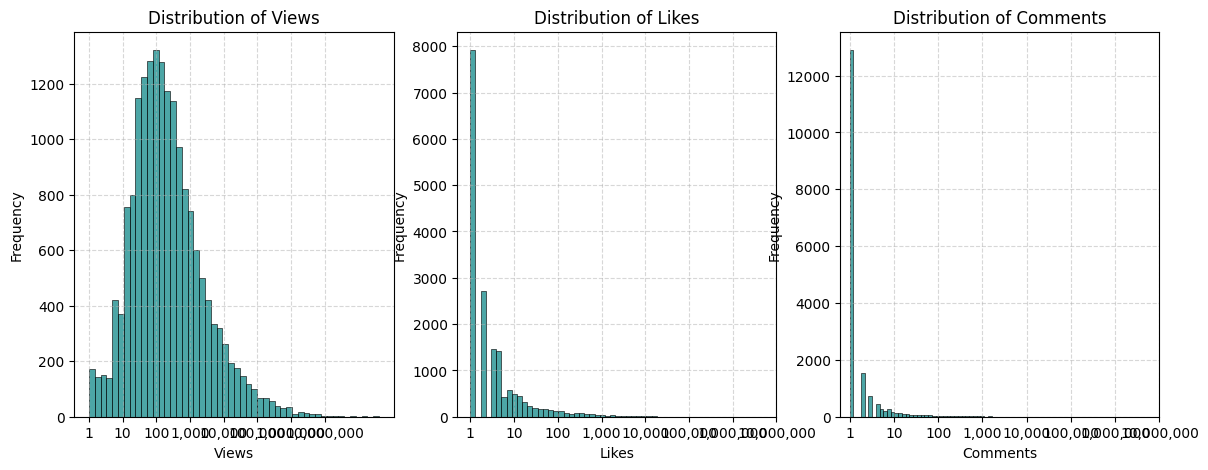

In [ ]:
# Histograms of Engagement Metrics (Views, Like, Comments)

import matplotlib.pyplot as plt
import seaborn as sns

engagement_metrics = ['views', 'likes', 'comments']
plt.figure(figsize=(14, 5))

for i, metric in enumerate(engagement_metrics, 1):
    plt.subplot(1, 3, i)
    log_data = np.log10(df[metric] + 1)
    sns.histplot(log_data, bins=50, color='teal', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {metric.capitalize()}')
    plt.xlabel(metric.capitalize())
    ticks = [0, 1, 2, 3, 4, 5, 6, 7]
    tick_labels = [f"{int(10**x):,}" for x in ticks]
    plt.xticks(ticks, tick_labels)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.5)

I then computed correlation coefficients with views and likes within this matrix:

In [ ]:
# Correlation Matrix between engagement-related metrics

corr_matrix = df[['views', 'likes', 'comments', 'duration']].corr()
corr_matrix

,views,likes,comments,duration
views,1.000000,0.778210,0.284168,0.002561
likes,0.778210,1.000000,0.460911,0.008580
comments,0.284168,0.460911,1.000000,0.033691
duration,0.002561,0.008580,0.033691,1.000000


This matrix showed a strong positive correlation, meaning more viewed videos tend to receive more likes. Meanwhile, comments correlated moderately with both views and likes, suggesting audience interaction scales with visibility, but not as strongly as likes. Duration had a weak or inconsistent relationship with engagement, implying that longer videos do not necessarily yield higher interactions.

Below is also a pairwise correlation bar plot showing the features users rely the most upon, when it comes to video interaction:

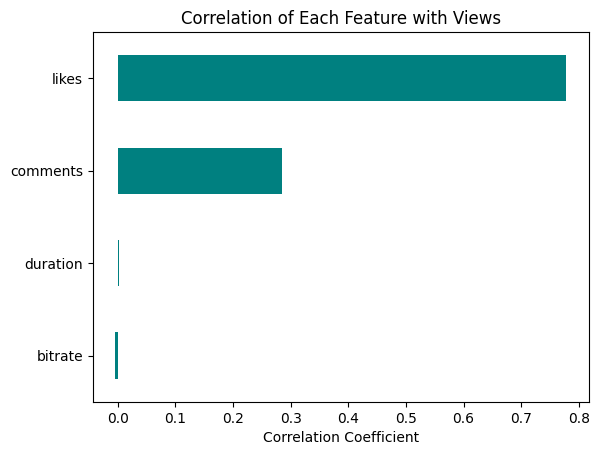

In [ ]:
# Pairwise Correlation Bar Chart

corr_with_views = df[['likes', 'comments', 'duration', 'bitrate']].corrwith(df['views']).sort_values()
corr_with_views.plot(kind='barh', color='teal')
plt.title('Correlation of Each Feature with Views')
plt.xlabel('Correlation Coefficient')
plt.show()

It shows how overwhelming users overwhemingly engage more with likes and comments on a video, than the video's duration or bitrate. This is important because it one example of how a video's length doesn't affect virality. We can also make a stronger case with this, based on the box plot below showing the views by video duration quartiles:

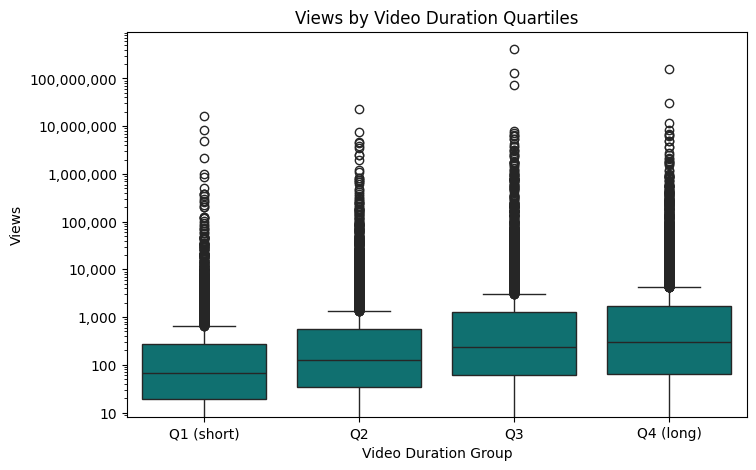

In [ ]:
# Box Plot: Views Across Video Distribution Quartiles

import matplotlib.ticker as mticker

df['duration_group'] = pd.qcut(df['duration'], q=4,
labels=['Q1 (short)', 'Q2', 'Q3', 'Q4 (long)'])
plt.figure(figsize=(8,5))
sns.boxplot(x='duration_group', y='views', color='teal', data=df)
plt.yscale('log')
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f'{int(y):,}'))
plt.title('Views by Video Duration Quartiles')
plt.xlabel('Video Duration Group')
plt.ylabel('Views')
plt.show()

Generally, regardless of video length, the views are relatively concistent here. However, at the same time, we also see a gradual increase along the box plots here, meaning that longer videos end up getting slightly more user engagement than shorter ones.

**Final Analysis - Final Models:**

After doing some initial EDA, I narrowed down the scope of my project to focus on using Random Forest and Gradient Boosting models to compare the R² and RMSE measurements of video duration, bitrate, and frame rate (independent X variables) against views per video (the dependent variable).

In order to contextualize the performance of the Random Forest and Gradient Boosting models, I added a simple Linear Regression baseline model only as a baseline comparison. I also expanded the predictor set to include encoded video categories to align with prior feedback. Because the primary predictive models in this project were tree-based (Random Forest and Gradient Boosting), the categorical metadata (‘video category’) was encoded using scikit-learn’s LabelEncoder. The video duration, bitrate, frame rate, and category encoded features were kept, while all of the other features were dropped.

Tree-based models handle integer-encoded categories without assuming an ordinal relationship, making LabelEncoder appropriate and computationally efficient. However, no additional encoding (e.g., one-hot encoding) was applied to the baseline model. I also would've done upload hour, however, that data was not available from within this dataset. Throughout these models, I applied a *log(y+1)* transformation to reduce skewness (since the dataset is large and heavily right-skewed) and stabilize variance. The models were then trained after applying Min/Max scaling to the feature set, followed by splitting the X-values into training/testing data into an 80-20 split.

In [ ]:
# Preprocessing Data

# Making additional imports
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

# Encoding video catagory
df['category_encoded'] = LabelEncoder().fit_transform(df['category'])

# Features and target variables
X = df[['duration', 'bitrate', 'frame rate', 'category_encoded']]
y = np.log1p(df['views']) # log(y+1) transform to reduce skewness

# Adding in Min/Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Training/Testing 80-20 Split with Scaled X-values
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,
random_state=42)


In [ ]:
# Baseline Model - Linear Regression

# Additional imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# R² and RMSE Measurements
lr_r2 = r2_score(y_test, lr_pred)
lr_rmse = mean_squared_error(y_test, lr_pred) ** 0.5

# Linear Regression Results
print("Linear Regression Results")
print(f"R²: {lr_r2:.3f}")
print(f"RMSE: {lr_rmse:.3f}")

Linear Regression Results
R²: 0.017
RMSE: 2.528


The intent of using both of these regression models is to compare their R² and RMSE measures of accuracy to draw conclusions about how metadata influences viewer engagement. Below are the regression model implementations and results with comments embedded:

In [ ]:
# Random Forest Regressor Model

# Making additional imports
from sklearn.ensemble import RandomForestRegressor

# Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# R² and RMSE Measurements
r2 = r2_score(y_test, y_pred_rf)
rmse = mean_squared_error(y_test, y_pred_rf) ** 0.5

# Random Forest Results
print("Random Forest Results:")
print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

Random Forest Results:
R²: 0.050
RMSE: 2.485


In [ ]:
# Gradient Boosting Model

# Additional imports
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Model
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
gbr_predict = gbr.predict(X_test)

# R² and RMSE Measurements
r2_gbr = r2_score(y_test, gbr_predict)
rmse_gbr = mean_squared_error(y_test, gbr_predict) ** 0.5

# Gradient Boosting Results
print("Gradient Boosting Results:")
print(f"R²: {r2_gbr:.3f}")
print(f"RMSE: {rmse_gbr:.3f}")

Gradient Boosting Results:
R²: 0.144
RMSE: 2.358


Additionally, I included an engagement ratio to lean into the additional insights of how the popularity of viewership is impacted by specific video categories:

In [ ]:
# Engagement Ratio Summary Table

# Ratios computation
df['Likes:Views'] = df['likes'] / df['views']
df['Comments:Views'] = df['comments'] / df['views']

# Summary table generation
ratio_summary = df.groupby('category')[['Likes:Views', 'Comments:Views']].mean().sort_values('Likes:Views', ascending=False)
ratio_summary = (ratio_summary * 100).round(2)
ratio_summary.head(10)

,Likes:Views,Comments:Views
category,,
Entertainment,inf,0.19
Gaming,2.34,0.77
Shows,1.09,0.21
Comedy,0.93,0.17
People & Blogs,0.92,0.18
Music,0.87,0.15
Film & Animation,0.80,0.23
Howto & Style,0.77,0.24
Nonprofits & Activis,0.66,0.13


**Hyperparameter Tuning:**
To ensure a fair comparison between the Random Forest and Gradient Boosting models, I performed hyperparameter tuning via GridSearchCV for each algorithm. The grids were intentionally kept small to prevent overfitting and to highlight whether model performance could be improved beyond the default settings. Each model was tuned using RMSE-based cross-validation, and the best-performing parameter sets are reported below:

In [ ]:
# Hyperparameter tuning

# Addional imports
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import numpy as np

# Random Forest tuning

# Defining parameter grid: controls model complexity (bias-variance tradeoff)
rf_grid = {
    'n_estimators': [100, 200], # More trees improve stablility
    'max_depth': [None, 10] #  None -> Fully grown trees; 10 -> More Regularized
}

# GridSearchCV performs cross-validation over all parameter combinations
rf_tuned = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_grid,
    cv=3, # 3-Fold Cross-Validation
    scoring='neg_mean_squared_error', # RMSE is the peformance metric
    n_jobs=-1 # Using all CPU scores for speed
)

# Fixing the tuned model
rf_tuned.fit(X_train, y_train)

# Converting negative MSE back into a positive RMSE
rf_best_rmse = (-rf_tuned.best_score_) ** 0.5

# Printing the results
print("Random Forest Best Parameters:", rf_tuned.best_params_)
print(f"Random Forest Best CV RMSE: {rf_best_rmse:.3f}")

# Gradient Boosting tuning

# Defining the grid: boosting is senstive to depth; small values avoid overfitting
gbr_grid = {
    'n_estimators': [50, 100], # Boosting iterations
    'max_depth': [3, 5] # Shallow trees are standard for boosting
}

gbr_tuned = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    gbr_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fitting the tuned model
gbr_tuned.fit(X_train, y_train)

# Converting negative MSE back into RMSE
gbr_best_rmse = (-gbr_tuned.best_score_) ** 0.5

# Printing the results
print("Gradient Boosting Best Parameters:", gbr_tuned.best_params_)
print(f"Gradient Boosting Best CV RMSE: {gbr_best_rmse:.3f}")

Random Forest Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Random Forest Best CV RMSE: 2.287
Gradient Boosting Best Parameters: {'max_depth': 5, 'n_estimators': 50}
Gradient Boosting Best CV RMSE: 2.273


Lastly, I included three model performance visualizations: feature importances, an actual vs. predicted scatter plot, and a residual plot for the Random Forest and Gradient boosting models. These visualizations help to further understand model behavior and diagnose prediction patterns:

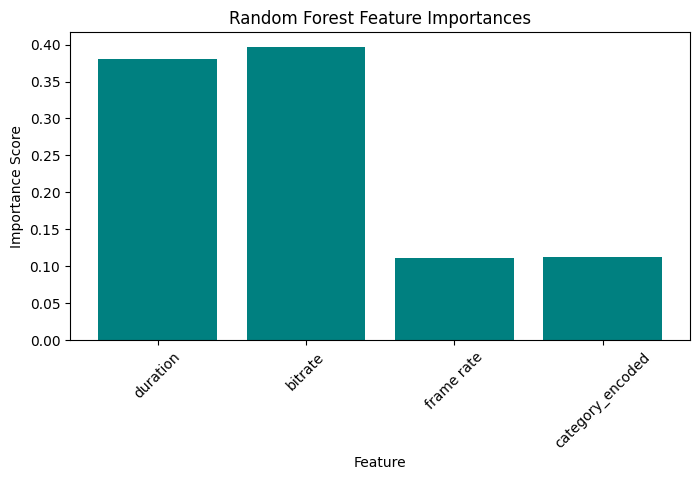

In [ ]:
# Random Forest Feature Importance Plot

# Additional imports
import matplotlib.pyplot as plt

# Plotting its feature importance
plt.figure(figsize=(8,4))
plt.bar(X.columns, rf.feature_importances_, color='teal')
plt.xticks(rotation=45)
plt.title("Random Forest Feature Importances")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()

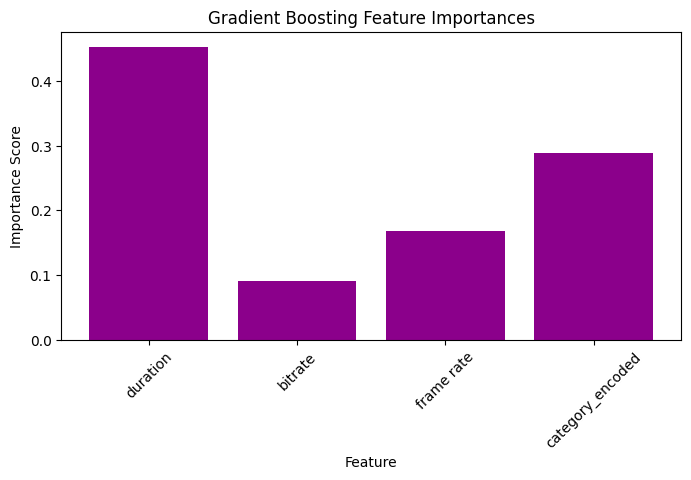

In [ ]:
# Gradient Boosting Feature Importance Plot

# Additional imports
import matplotlib.pyplot as plt

# Plotting its feature importance
plt.figure(figsize=(8,4))
plt.bar(X.columns, gbr.feature_importances_, color='darkmagenta')
plt.xticks(rotation=45)
plt.title("Gradient Boosting Feature Importances")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()

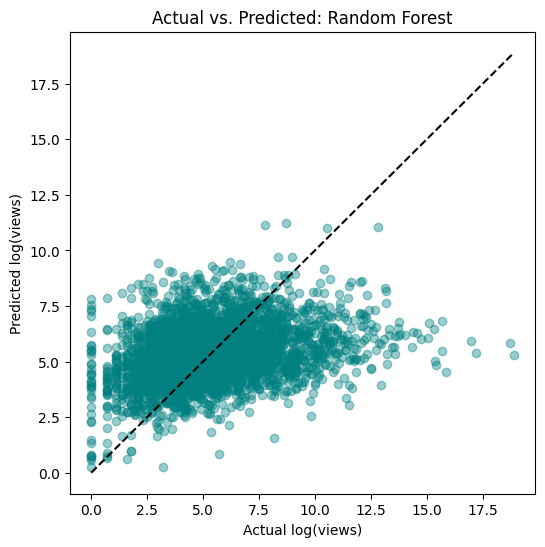

In [ ]:
# Actual vs. Predicted Plot: Random Forest

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.4, color='teal')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black')
plt.xlabel("Actual log(views)")
plt.ylabel("Predicted log(views)")
plt.title("Actual vs. Predicted: Random Forest")
plt.show()

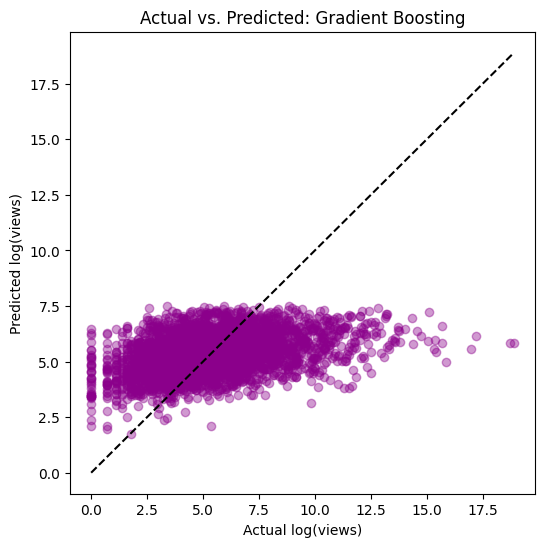

In [ ]:
# Actual vs. Predicted Plot: Gradient Boosting

plt.figure(figsize=(6,6))
plt.scatter(y_test, gbr_predict, alpha=0.4, color='darkmagenta')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black')
plt.xlabel("Actual log(views)")
plt.ylabel("Predicted log(views)")
plt.title("Actual vs. Predicted: Gradient Boosting")
plt.show()

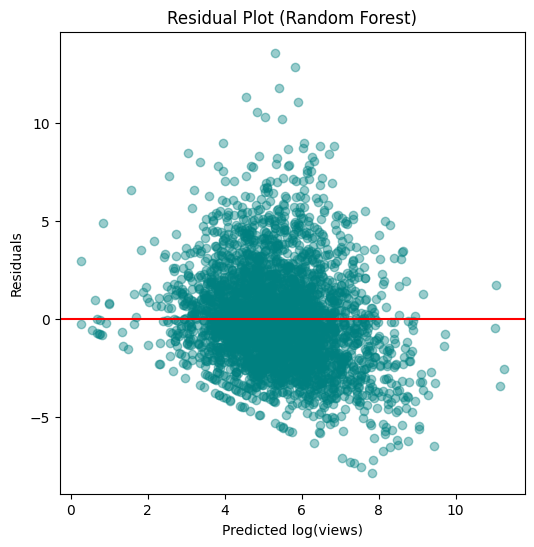

In [ ]:
# Random Forest Residual Plot

# Residual calculations for Random Forest model
residuals = y_test - y_pred_rf

# Plotting the residuals
plt.figure(figsize=(6,6))
plt.scatter(y_pred_rf, residuals, alpha=0.4, color='teal')
plt.axhline(0, color='red')
plt.xlabel("Predicted log(views)")
plt.ylabel("Residuals")
plt.title("Residual Plot (Random Forest)")
plt.show()

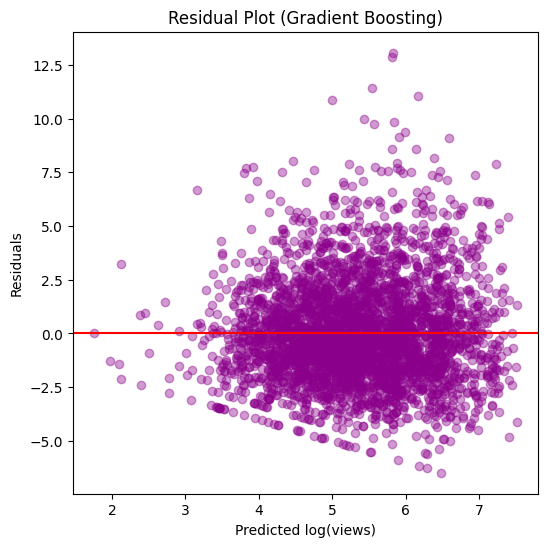

In [ ]:
# Gradient Boosting Residual Plot

# Residual calculations for Gradient Boosting model
residuals_2 = y_test - gbr_predict

# Plotting the residuals
plt.figure(figsize=(6,6))
plt.scatter(gbr_predict, residuals_2, alpha=0.4, color='darkmagenta')
plt.axhline(0, color='red')
plt.xlabel("Predicted log(views)")
plt.ylabel("Residuals")
plt.title("Residual Plot (Gradient Boosting)")
plt.show()

**Final Analysis - Full Analysis:**

We can see initially that the engagement metrics were heavily skewed and only weakly related to basic video metadata. This aligned with the poor performance of linear regression (R² = 0.017, RMSE = 2.528) and the diagnostic plots, which showed a consistent underestimation of high-engagement videos. Tree-based models captured more nonlinear structure, but the Random Forest provided only a small improvement (R² = 0.050, RMSE = 2.485), and even Gradient Boosting—the best model, explained just 14% of engagement variance (R² = 0.144) while achieving the lowest prediction error (RMSE = 2.358).

The RMSE values here represent the average prediction error in log-transformed view counts, so lower scores indicate better accuracy. For example, we see that the log-RMSEs of 2.358 (Gradient-Boosting) implies that the predictions are off by about a factor of 10^2.358 ≈ ~228 on the original scale. Although Gradient Boosting reduced RMSE compared to the baseline, the improvement was modest, reinforcing that the metadata features alone have limited predictive power.

The feature-importance plots indicated that bitrate and duration contributed more to predictions than the other metadata features. Also, the engagement-ratio comparisons showed some category-level differences. For example, Gaming had significantly higher ratios (likes-to-views = 2.34, comments-to-views = 0.77). We also see that shows had higher likes-to-views ratios at 1.09, with comedy at 0.93, and people/blogs at 0.92.

**Conclusions and Recommendations:**

These findings suggest that Gaming videos tend to drive video engagement more than most other video categories, with likes tending to receive more engagement than comments. While some categories appear more engaging than others, both category and technical metadata offer limited predictive value. Overall, these predictive models should incorporate richer behavioral and semantic features. The current findings indicate that most variation in YouTube engagement is driven by factors not present in this dataset, such as content quality, audience behavior, channel reputation, and recommendation-based algorithms. This is largely due to missing semantic and behavioral metadata such as channel subscriber count, upload timing, title text embeddings, thumbnail features, and NLP-based attributes.